In [1]:
from transformers import FlavaProcessor, FlavaModel
from PIL import Image
import torch

# now t-SNE
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Load FLAVA model and processor
processor = FlavaProcessor.from_pretrained("facebook/flava-full")
model = FlavaModel.from_pretrained("facebook/flava-full")

c:\Users\adits\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


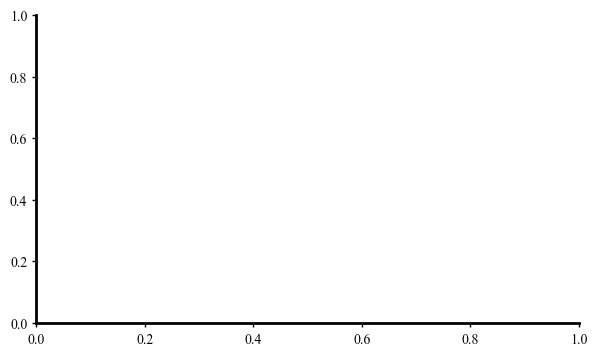

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# set global settings
def init_plotting():
    plt.rcParams['figure.figsize'] = (7., 4.)
    plt.rcParams['font.size'] = 12
    # plt.rcParams['font.family'] = 'T'
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    # plt.rcParams['savefig.dpi'] = 2*plt.rcParams['savefig.dpi']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    # plt.rcParams['legend.frameon'] = False
    # plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 2.

    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.gca().yaxis.set_ticks_position('left')

init_plotting()

In [3]:
lis_5 = ["man", "king", "uncle", "brother", "son", "father", "husband", "boyfriend"]
lis_6 = ["woman", "queen", "aunt", "sister", "daughter", "mother", "wife", "girlfriend"]

c:\Users\adits\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\modeling_utils.py:1160: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


cosine similarity between mean and man - woman is: 0.760260820388794
cosine similarity between mean and king - queen is: 0.67392897605896
cosine similarity between mean and uncle - aunt is: 0.8057767748832703
cosine similarity between mean and brother - sister is: 0.746973991394043
cosine similarity between mean and son - daughter is: 0.6960564851760864
cosine similarity between mean and father - mother is: 0.8403066992759705
cosine similarity between mean and husband - wife is: 0.7522316575050354
cosine similarity between mean and boyfriend - girlfriend is: 0.7334722280502319


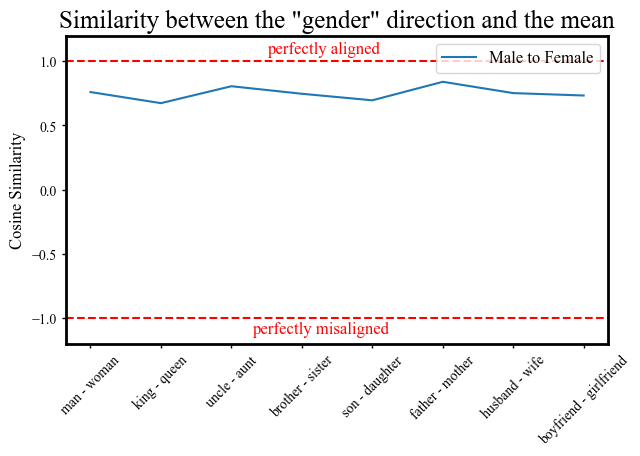

In [ ]:
# let's get the distribution
def get_distribution(lis_1, lis_2):
    embeddings = []
    for word1, word2 in zip(lis_1, lis_2):
        inputs = processor(text=word1, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)
            text_embeddings = outputs.text_embeddings
            cls_token_multimodal_1 = text_embeddings[:, 0, :].squeeze()

        inputs = processor(text=word2, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)
            text_embeddings = outputs.text_embeddings
            cls_token_multimodal_2 = text_embeddings[:, 0, :].squeeze()
    
        diff = cls_token_multimodal_2 - cls_token_multimodal_1
        embeddings.append(diff)
    
    return embeddings

embeddings = get_distribution(lis_5, lis_6)

# the mean of the embeddings
mean = torch.mean(torch.stack(embeddings), dim=0)

# now let's get the cosine similarity between the mean and the embeddings
for i in range(len(embeddings)):
    cos = torch.nn.functional.cosine_similarity(mean, embeddings[i], dim=0)
    print(f"cosine similarity between mean and {lis_5[i]} - {lis_6[i]} is: {cos}")


# let's plot the cosine similarity
cos_sim = [torch.nn.functional.cosine_similarity(mean, embedding, dim=0) for embedding in embeddings]
plt.plot(cos_sim, label="Male to Female")
plt.ylabel("Cosine Similarity", fontfamily='Times New Roman')
plt.ylim(-1.2, 1.2)
plt.xticks(range(len(lis_5)), [f"{lis_5[i]} - {lis_6[i]}" for i in range(len(lis_5))], rotation=45, fontfamily='Times New Roman')

# now we draw a line at y = 1
plt.axhline(y=1, color='r', linestyle='--')
# annotate the line "perfectly aligned"
plt.text(2.5, 1.06, 'perfectly aligned', color = 'red', fontsize=12, fontfamily='Times New Roman')

plt.axhline(y=-1, color='r', linestyle='--')
plt.text(2.3, -1.12, 'perfectly misaligned', color = 'red', fontsize=12, fontfamily='Times New Roman')
plt.legend(loc='upper right')
plt.title("Similarity between the \"gender\" direction and the mean")
# plt.savefig("gender_direction.pdf", bbox_inches='tight')
plt.show()